In [1]:
#-*- coding: utf-8 -*-

# 代码6-1

import numpy as np
import pandas as pd

inputfile = '../data/data.csv' # 输入的数据文件
data = pd.read_csv(inputfile) # 读取数据

# 描述性统计分析
description = [data.min(), data.max(), data.mean(), data.std()]  # 依次计算最小值、最大值、均值、标准差
description = pd.DataFrame(description, index = ['Min', 'Max', 'Mean', 'STD']).T  # 将结果存入数据框
print('描述性统计结果：\n',np.round(description, 2))  # 保留两位小数

描述性统计结果：
             Min         Max        Mean         STD
x1   3831732.00  7599295.00  5579519.95  1262194.72
x2       181.54     2110.78      765.04      595.70
x3       448.19     6882.85     2370.83     1919.17
x4      7571.00    42049.14    19644.69    10203.02
x5      6212.70    33156.83    15870.95     8199.77
x6   6370241.00  8323096.00  7350513.60   621341.85
x7       525.71     4454.55     1712.24     1184.71
x8       985.31    15420.14     5705.80     4478.40
x9        60.62      228.46      129.49       50.51
x10       65.66      852.56      340.22      251.58
x11       97.50      120.00      103.31        5.51
x12        1.03        1.91        1.42        0.25
x13     5321.00    41972.00    17273.80    11109.19
y         64.87     2088.14      618.08      609.25


In [2]:
# 代码6-2

# 相关性分析
corr = data.corr(method = 'pearson')  # 计算相关系数矩阵
print('相关系数矩阵为：\n',np.round(corr, 2))  # 保留两位小数


相关系数矩阵为：
        x1    x2    x3    x4    x5    x6    x7    x8    x9   x10   x11   x12  \
x1   1.00  0.95  0.95  0.97  0.97  0.99  0.95  0.97  0.98  0.98 -0.29  0.94   
x2   0.95  1.00  1.00  0.99  0.99  0.92  0.99  0.99  0.98  0.98 -0.13  0.89   
x3   0.95  1.00  1.00  0.99  0.99  0.92  1.00  0.99  0.98  0.99 -0.15  0.89   
x4   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.19  0.91   
x5   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.18  0.90   
x6   0.99  0.92  0.92  0.95  0.95  1.00  0.93  0.95  0.97  0.96 -0.34  0.95   
x7   0.95  0.99  1.00  0.99  0.99  0.93  1.00  0.99  0.98  0.99 -0.15  0.89   
x8   0.97  0.99  0.99  1.00  1.00  0.95  0.99  1.00  0.99  1.00 -0.15  0.90   
x9   0.98  0.98  0.98  0.99  0.99  0.97  0.98  0.99  1.00  0.99 -0.23  0.91   
x10  0.98  0.98  0.99  1.00  1.00  0.96  0.99  1.00  0.99  1.00 -0.17  0.90   
x11 -0.29 -0.13 -0.15 -0.19 -0.18 -0.34 -0.15 -0.15 -0.23 -0.17  1.00 -0.43   
x12  0.94  0.89  0.89  0.91  0.90  0.95  0

F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
F:\Anaconda\lib\site-packages\IPython\core\pylabtools.p

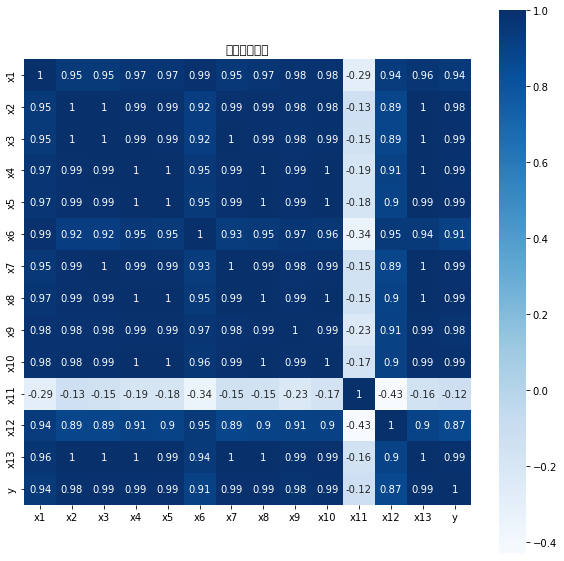

<function matplotlib.pyplot.close(fig=None)>

In [3]:
# 代码6-3

# 绘制热力图
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(10, 10)) # 设置画面大小
sns.heatmap(corr, annot=True, vmax=1, square=True, cmap="Blues")
plt.title('相关性热力图')
plt.show()
plt.close

In [4]:
#-*- coding: utf-8 -*-

# 代码6-4

import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso

inputfile = '../data/data.csv'  # 输入的数据文件
data = pd.read_csv(inputfile)  # 读取数据
lasso = Lasso(1000)  # 调用Lasso()函数，设置λ的值为1000
lasso.fit(data.iloc[:,0:14],data['y'])
print('相关系数为：',np.round(lasso.coef_,5))  # 输出结果，保留五位小数

print('相关系数非零个数为：',np.sum(lasso.coef_ != 0))  # 计算相关系数非零的个数

mask = lasso.coef_ != 0  # 返回一个相关系数是否为零的布尔数组
print('相关系数是否不为零：',mask)

outputfile ='../tmp/new_reg_data.csv'  # 输出的数据文件
new_reg_data = data.iloc[:, mask]  # 返回相关系数非零的数据
new_reg_data.to_csv(outputfile)  # 存储数据
print('输出数据的维度为：',new_reg_data.shape)  # 查看输出数据的维度

相关系数为： [-5.0000e-05 -0.0000e+00  0.0000e+00 -1.0300e-03  1.5910e-02  1.0000e-05
  1.9920e-02  1.2490e-02 -0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  7.5805e-01]
相关系数非零个数为： 7
相关系数是否不为零： [ True False False  True  True  True  True  True False False False False
 False  True]
输出数据的维度为： (20, 7)


F:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.794e+04, tolerance: 7.053e+02
  model = cd_fast.enet_coordinate_descent(


In [5]:
#-*- coding: utf-8 -*-

# 代码6-5

import sys
sys.path.append('../code')  # 设置路径
import numpy as np
import pandas as pd
from GM11 import GM11  # 引入自编的灰色预测函数

inputfile1 = '../tmp/new_reg_data.csv'  # 输入的数据文件
inputfile2 = '../data/data.csv'  # 输入的数据文件
new_reg_data = pd.read_csv(inputfile1)  # 读取经过特征选择后的数据
data = pd.read_csv(inputfile2)  # 读取总的数据
new_reg_data.index = range(1994, 2014)
new_reg_data.loc[2014] = None
new_reg_data.loc[2015] = None
l = ['x1', 'x4', 'x5', 'x6', 'x7', 'x8', 'y']
for i in l:
  f = GM11(new_reg_data.loc[range(1994, 2014),i].to_numpy())[0]
  new_reg_data.loc[2014,i] = f(len(new_reg_data)-1)  # 2014年预测结果
  new_reg_data.loc[2015,i] = f(len(new_reg_data))  # 2015年预测结果
  new_reg_data[i] = new_reg_data[i].round(2)  # 保留两位小数
outputfile = '../tmp/new_reg_data_GM11.xls'  # 灰色预测后保存的路径
y = list(data['y'].values)  # 提取财政收入列，合并至新数据框中
y.extend([np.nan,np.nan])
new_reg_data['y'] = y
new_reg_data.to_excel(outputfile)  # 结果输出
print('预测结果为：\n',new_reg_data.loc[2014:2015,:])  # 预测结果展示


C:\Users\23571\AppData\Local\Temp\ipykernel_23380\204892436.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_reg_data.loc[2014] = None
C:\Users\23571\AppData\Local\Temp\ipykernel_23380\204892436.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_reg_data.loc[2015] = None
C:\Users\23571\AppData\Local\Temp\ipykernel_23380\204892436.py:28: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set

预测结果为：
       Unnamed: 0          x1        x4        x5          x6       x7  \
2014         NaN  8142148.24  43611.84  35046.63  8505522.58  4600.40   
2015         NaN  8460489.28  47792.22  38384.22  8627139.31  5214.78   

            x8   y  
2014  18686.28 NaN  
2015  21474.47 NaN  


F:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\23571\AppData\Local\Temp\ipykernel_23380\1256569604.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'][20]=data['y_pred'][20]
C:\Users\23571\AppData\Local\Temp\ipykernel_23380\1256569604.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'][21]=data['y_pred'][21]
C:\Users\23571\AppData\Local\Temp\ipykernel_23380\1256569604.py:25: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future v

真实值与预测值分别为：
               y       y_pred
0     64.870000    40.603244
1     99.750000    95.655122
2     88.110000   103.863942
3    106.070000   106.272218
4    137.320000   149.303292
5    188.140000   188.140000
6    219.910000   218.031632
7    271.910000   228.756032
8    269.100000   210.642993
9    300.550000   299.640630
10   338.450000   392.423490
11   408.860000   475.302107
12   476.720000   565.427532
13   838.990000   702.321043
14   843.140000   843.680286
15  1107.670000  1096.675789
16  1399.160000  1388.920193
17  1535.140000  1538.898548
18  1579.680000  1738.817804
19  2088.140000  2090.906956
20  2215.115153  2215.115153
21  2561.553043  2561.553043


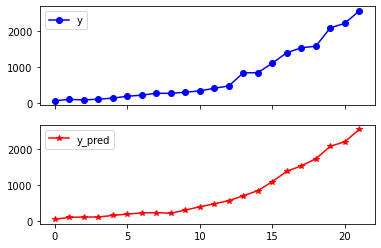

[[1.         0.99753075]
 [0.99753075 1.        ]]


In [8]:
# 代码6-6

import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR

inputfile = '../tmp/new_reg_data_GM11.xls'  # 灰色预测后保存的路径
data = pd.read_excel(inputfile)  # 读取数据
feature = ['x1', 'x4', 'x5', 'x6', 'x7', 'x8']  # 属性所在列
# data_train = data.loc[range(1994,2014)].copy()  # 取2014年前的数据建模
data_train = data.loc[0:19,:]
data_mean = data_train.mean()
data_std = data_train.std()
data_train = (data_train - data_mean)/data_std  # 数据标准化
x_train = data_train[feature].to_numpy()  # 属性数据
y_train = data_train['y'].to_numpy()  # 标签数据

linearsvr = LinearSVR()  # 调用LinearSVR()函数
linearsvr.fit(x_train,y_train)
x = ((data[feature] - data_mean[feature])/data_std[feature]).to_numpy()  # 预测，并还原结果。
data['y_pred'] = linearsvr.predict(x) * data_std['y'] + data_mean['y']
data['y'][20]=data['y_pred'][20]
data['y'][21]=data['y_pred'][21]

outputfile = '../tmp/new_reg_data_GM11_revenue.xls'  # SVR预测后保存的结果
data.to_excel(outputfile)

print('真实值与预测值分别为：\n',data[['y','y_pred']])

fig = data[['y','y_pred']].plot(subplots = True, style=['b-o','r-*'])  # 画出预测结果图
plt.show()
print(np.corrcoef(data['y'],data['y_pred']))

In [7]:
#-*- coding: utf-8 -*-

def GM11(x0): #自定义灰色预测函数
  import numpy as np
  x1 = x0.cumsum() #1-AGO序列
  z1 = (x1[:len(x1)-1] + x1[1:])/2.0 #紧邻均值（MEAN）生成序列
  z1 = z1.reshape((len(z1),1))
  B = np.append(-z1, np.ones_like(z1), axis = 1)
  Yn = x0[1:].reshape((len(x0)-1, 1))
  [[a],[b]] = np.dot(np.dot(np.linalg.inv(np.dot(B.T, B)), B.T), Yn) #计算参数
  f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2)) #还原值
  delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))
  C = delta.std()/x0.std()
  P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
  return f, a, b, x0[0], C, P #返回灰色预测函数、a、b、首项、方差比、小残差概率